# Задача 3
Моделирование выборки из абсолютно непрерывного закона распределения методом обратных функций.

Задание. 
1. Для данного n методом обратных функций смоделируйте выборку из закона распределения с заданной плотностью  p(x).
2. Для полученной выборки найдите гистограмму относительных частот.  Постройте на одном рисунке графики теоретической плотности p(x) и гистограмму относительных частот.
3. Вычислите выборочное среднее и выборочную дисперсию и сравните с истинными значениями этих характеристик.
4. Используя неравенство Dvoretzky-Kiefer-Wolfowitz, постройте 90% доверительный интервал для функции распределения F(x).
Приведите графическую иллюстрацию


## Данные варианта
Номер варианта - 15  
Плотность распределения теоретического закона  $$p(x) = \frac{8x^2e^{-2x}}{\Gamma(3)}, x > 0$$  
Объем выборки n = 120

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import random
import scipy
import numpy as np
import seaborn
from IPython.display import Markdown as md

## Моделируем n случайных чисел

In [2]:
n = 120


In [3]:
y_rand = [random.random() for i in range(n)]
print(f'Y^T = {[round(i, 3) for i in y_rand][:10]}')

Y^T = [0.995, 0.502, 0.259, 0.909, 0.213, 0.235, 0.714, 0.929, 0.553, 0.065]


## Пересчитываем по алгоритму

$$p_{x_в}(x) = \frac{x^2*e^{-x}}{\Gamma(3)} = 2p(2x)$$

$$ p(x) = \frac{1}{2}p_{x_в}(\frac{x}{2}) $$

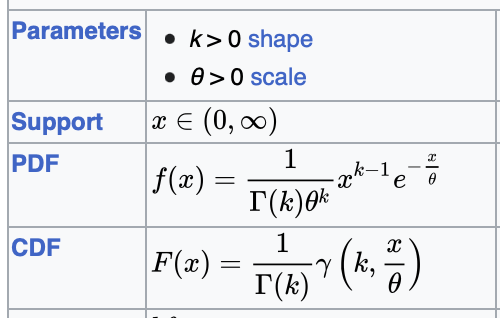

https://en.wikipedia.org/wiki/Gamma_distribution

$F(x)_в = \int_0^x p_в(u)du =\frac{1}{\Gamma(3)} * (2 - e^{-x}(x(x+2)+2))$

$F(x) = \int_0^xp(u)du =\frac{1}{\Gamma(3)} * (2 - \frac{1}{4} e^{\frac{-x}{2}}(x^2+4x+8))$

In [4]:
x_rand = [scipy.stats.gamma.ppf(val, 3, scale=1/2) for val in y_rand]
print(f'X^T = {[round(i, 3) for i in x_rand][:10]}')

X^T = [4.628, 1.34, 0.88, 2.727, 0.792, 0.835, 1.85, 2.903, 1.449, 0.458]


## Проводим первоначальную обработку

In [5]:
omega = max(x_rand) - min(x_rand)
l = math.trunc(1 + math.log(n, 2))
h = (max(x_rand) - min(x_rand)) / l
intervals = [min(x_rand) + h * i for i in range(1,l+1)]
intervals_centers = [(min(x_rand) + h / 2) + h * i for i in range(l)]

In [6]:
freq = [0] * l
for val in x_rand:
    for j in range(l):
        if intervals[j] > val:
            freq[j] += 1
            break
freq[-1] += 1
rel_freq = [val / n for val in freq]
print(f'''Крайние члены вариационного ряда: 
max(X) = {round(max(x_rand), 5)}, 
min(X) = {round(min(x_rand),5)},
Размах выборки: omega = max(X) - min(X)= {round(omega, 5)}
Количество интервалов: l = |1+log_2(n)| = {l}
Длина интервалов: h = (max(X) - min(X)) / l = {round(h, 5)}''')

Крайние члены вариационного ряда: 
max(X) = 4.62818, 
min(X) = 0.15983,
Размах выборки: omega = max(X) - min(X)= 4.46835
Количество интервалов: l = |1+log_2(n)| = 7
Длина интервалов: h = (max(X) - min(X)) / l = 0.63834


In [16]:
df = pd.DataFrame()
int = [(round(min(x_rand) + i * h, 3), round(min(x_rand) + (i + 1) * h, 3)) for i in range(l)]
interval_rows = ['[{}, {})'.format(val[0], val[1]) for val in int]
interval_rows[l - 1] = '[{}, {}]'.format(int[l - 1][0], int[l - 1][1])
p_rows = [freq[i]/(h*n) for i in range(l)]
print(f'{"   Интервалы":17} {"Ср зн":5} {" Част":5} {"Отн.ч.":6} {"Плотн. отн. ч":6}')

   Интервалы      Ср зн  Част Отн.ч. Плотн. отн. ч


In [17]:
for i in range(len(interval_rows)):
    print(f'{interval_rows[i]:17} {round(intervals_centers[i], 3):5} {round(freq[i], 3):5} {round(rel_freq[i], 3):6} {round(p_rows[i], 3):6}')


[0.16, 0.798)     0.479    27  0.225  0.352
[0.798, 1.436)    1.117    49  0.408   0.64
[1.436, 2.075)    1.756    24    0.2  0.313
[2.075, 2.713)    2.394     8  0.067  0.104
[2.713, 3.352)    3.032     9  0.075  0.117
[3.352, 3.99)     3.671     2  0.017  0.026
[3.99, 4.628]     4.309     1  0.008  0.013


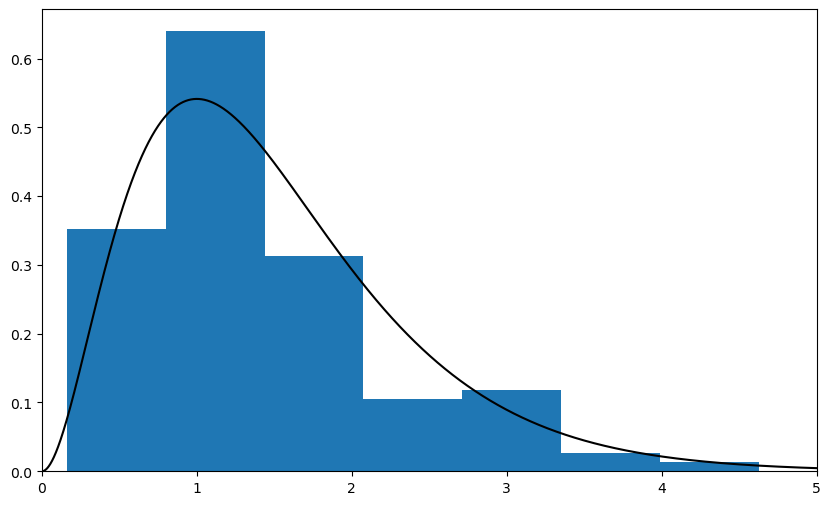

In [9]:
plt.figure(figsize=(10,6))
x = intervals_centers
y = [i / h for i in rel_freq]
plt.bar(x, y, width=h)
x1 = np.arange(0, 2*(max(x_rand) + 1), 0.001)
y1 = scipy.stats.gamma.pdf(x1, 3, scale=1/2)
plt.plot(x1, y1, color = 'black')
plt.xlim(0, 5)
plt.show()

## Сравниваем характеристики

In [46]:
theor_mean = scipy.stats.gamma.mean(3, scale=1/2)
theor_var = scipy.stats.gamma.var(3, scale=1/2)
emp_mean = sum(x_rand)/n
emp_var = sum([(val-emp_mean) ** 2 for val in x_rand]) / (n - 1)
md(f'Выборочное среднее: X_ср = {round(emp_mean, 3)}')


Выборочное среднее: X_ср = 1.408

In [43]:
md(f'Теоретическое среднее: M_xi = $k * \\theta$ = 3 * 0.5 = {round(theor_mean, 3)}')


Теоретическое среднее: M_xi = $k * \theta$ = 3 * 0.5 = 1.5

In [45]:
md(f'Выборочная дисперсия: $S^2$ = {round(emp_var, 3)}')


Выборочная дисперсия: $S^2$ = 0.662

In [47]:
md('Теоретическая дисперсия: D = $k * \\theta^2$ = 3 * 0.25 = {}'.format(round(theor_var, 3)))

Теоретическая дисперсия: D = $k * \theta^2$ = 3 * 0.25 = 0.75

In [11]:
print(f'''|M_xi - X_ср| = {round(abs(emp_mean - theor_mean), 3)}
D / S^2 = {round(theor_var / emp_var, 3)}
Выборочные и теоретические матожидания и дисперсии близки''')

|M_xi - X_ср| = 0.092
D / S^2 = 1.132
Выборочные и теоретические матожидания и дисперсии близки


## Найдем эмпирическую функцию распределения и построим доверительный интервал на основе неравенства Дворецкого-Кифера-Волфовица


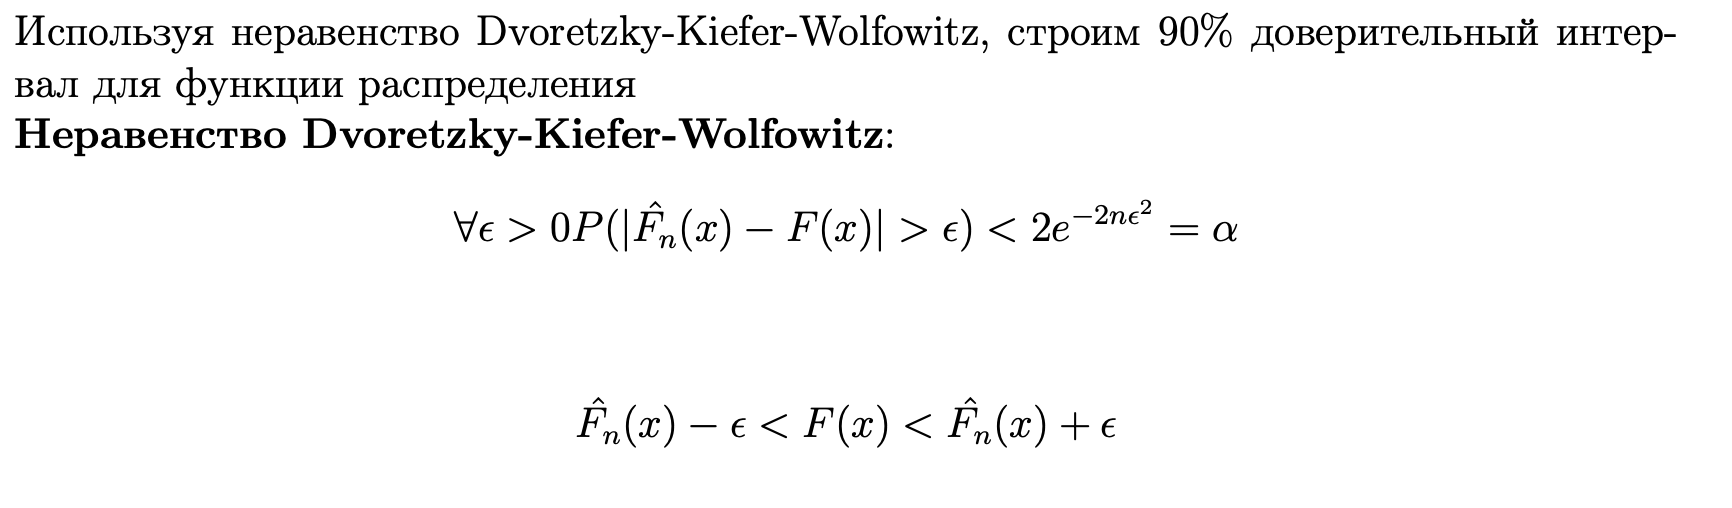

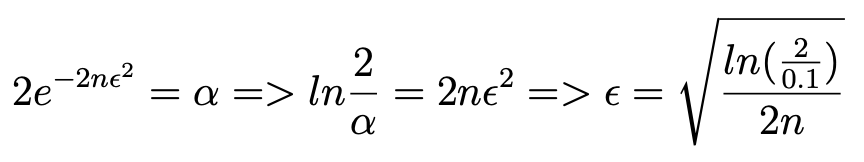

In [12]:
epsilon = math.sqrt(1/(2*n)*math.log(2/0.1))
print(f'''Вероятность попадания в интервал составляет 90%, следовательно, alpha=0.1,
тогда из неравенства Дворецкого-Кифера-Волфовица: 
epsilon = {round(epsilon, 5)}''')

Вероятность попадания в интервал составляет 90%, следовательно, alpha=0.1,
тогда из неравенства Дворецкого-Кифера-Волфовица: 
epsilon = 0.11172


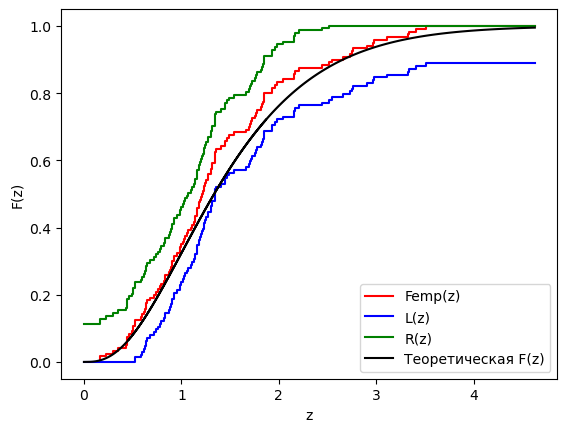

In [13]:
y1 = sorted(x_rand)
x1 = [len(y1[:i+1])/n for i in range(n)]
plt.step(y1, x1, color = 'red', label='Femp(z)')
L_z_x = [max(val - epsilon, 0) for val in x1]
R_z_x = [epsilon]*2 + [min(val + epsilon, 1) for val in x1]
plt.step([0] + y1, [0] + L_z_x, color = 'blue', label='L(z)')
plt.step([0] + [min(y1)] + y1, R_z_x, color = 'green', label='R(z)')
x1 = np.arange(0, max(x_rand), 0.001)
y1 = scipy.stats.gamma.cdf(x1, 3, scale=1/2)
plt.step(x1, y1, color = 'black', label='Теоретическая F(z)')
plt.legend(loc='best')
plt.xlabel("z")
plt.ylabel("F(z)")
plt.show()

*Вывод*  
 
В домашнем задании было произведено моделирование выборки из абсолютно непрерывного закона методом обратных функций, построены доверительные интервалы с использованием неравенства Дворецкого-Кифера-Волфовица. 
Полученная выборка обладает математическим ожиданием и дисперсией близкими к теоретическим.  
Были построены гистограммы относительных частот, эмпирическая функция распределения и доверительный интервал.